In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from src.preprocess import stratify5
from src.aggregate_features import generate_GC_features
from src.read_data import load_reference_data2


df = pd.read_csv('./data/derived/cg_bias/hiv_cg_bias.csv')
ratio = pd.read_csv('./data/derived/cg_bias/hiv_gc_ratio.csv')

In [12]:
_, _, gag, pol, gp120, gp41 = load_reference_data2('./data/')

In [13]:
GC_features = generate_GC_features(ratio, gag, pol, gp120, gp41)
GC_features = stratify5(GC_features)
GC_features

,RENAME_ID,TSI_days,genome_GCratio,gag_GCratio,pol_GCratio,gp120_GCratio,gp41_GCratio,TSI_category
0,AID0004-fq1,5306,1.415776,1.372029,1.420068,1.318270,1.568694,4y+
1,AID0009-fq1,299,1.450862,1.373778,1.437013,1.380818,1.512333,6m-12m
2,AID0022-fq1,3790,1.457240,1.360018,1.462189,1.451904,1.455617,4y+
3,AID0041-fq1,281,1.391668,1.321824,1.403405,1.334049,1.404180,6m-12m
4,AID0048-fq1,3974,1.385571,1.285452,1.396314,1.319979,1.521634,4y+
...,...,...,...,...,...,...,...,...
1046,AID9096-fq1,776,1.416816,1.339078,1.483611,1.281415,1.456327,2y-4y
1047,AID9105-fq2,1427,1.423184,1.416578,1.449136,1.347313,1.511861,2y-4y
1048,AID9107-fq1,339,1.429983,1.342976,1.468672,1.414201,1.428138,6m-12m
1049,AID9113-fq1,133,1.433999,1.333731,1.390965,1.356763,1.659558,0m-6m


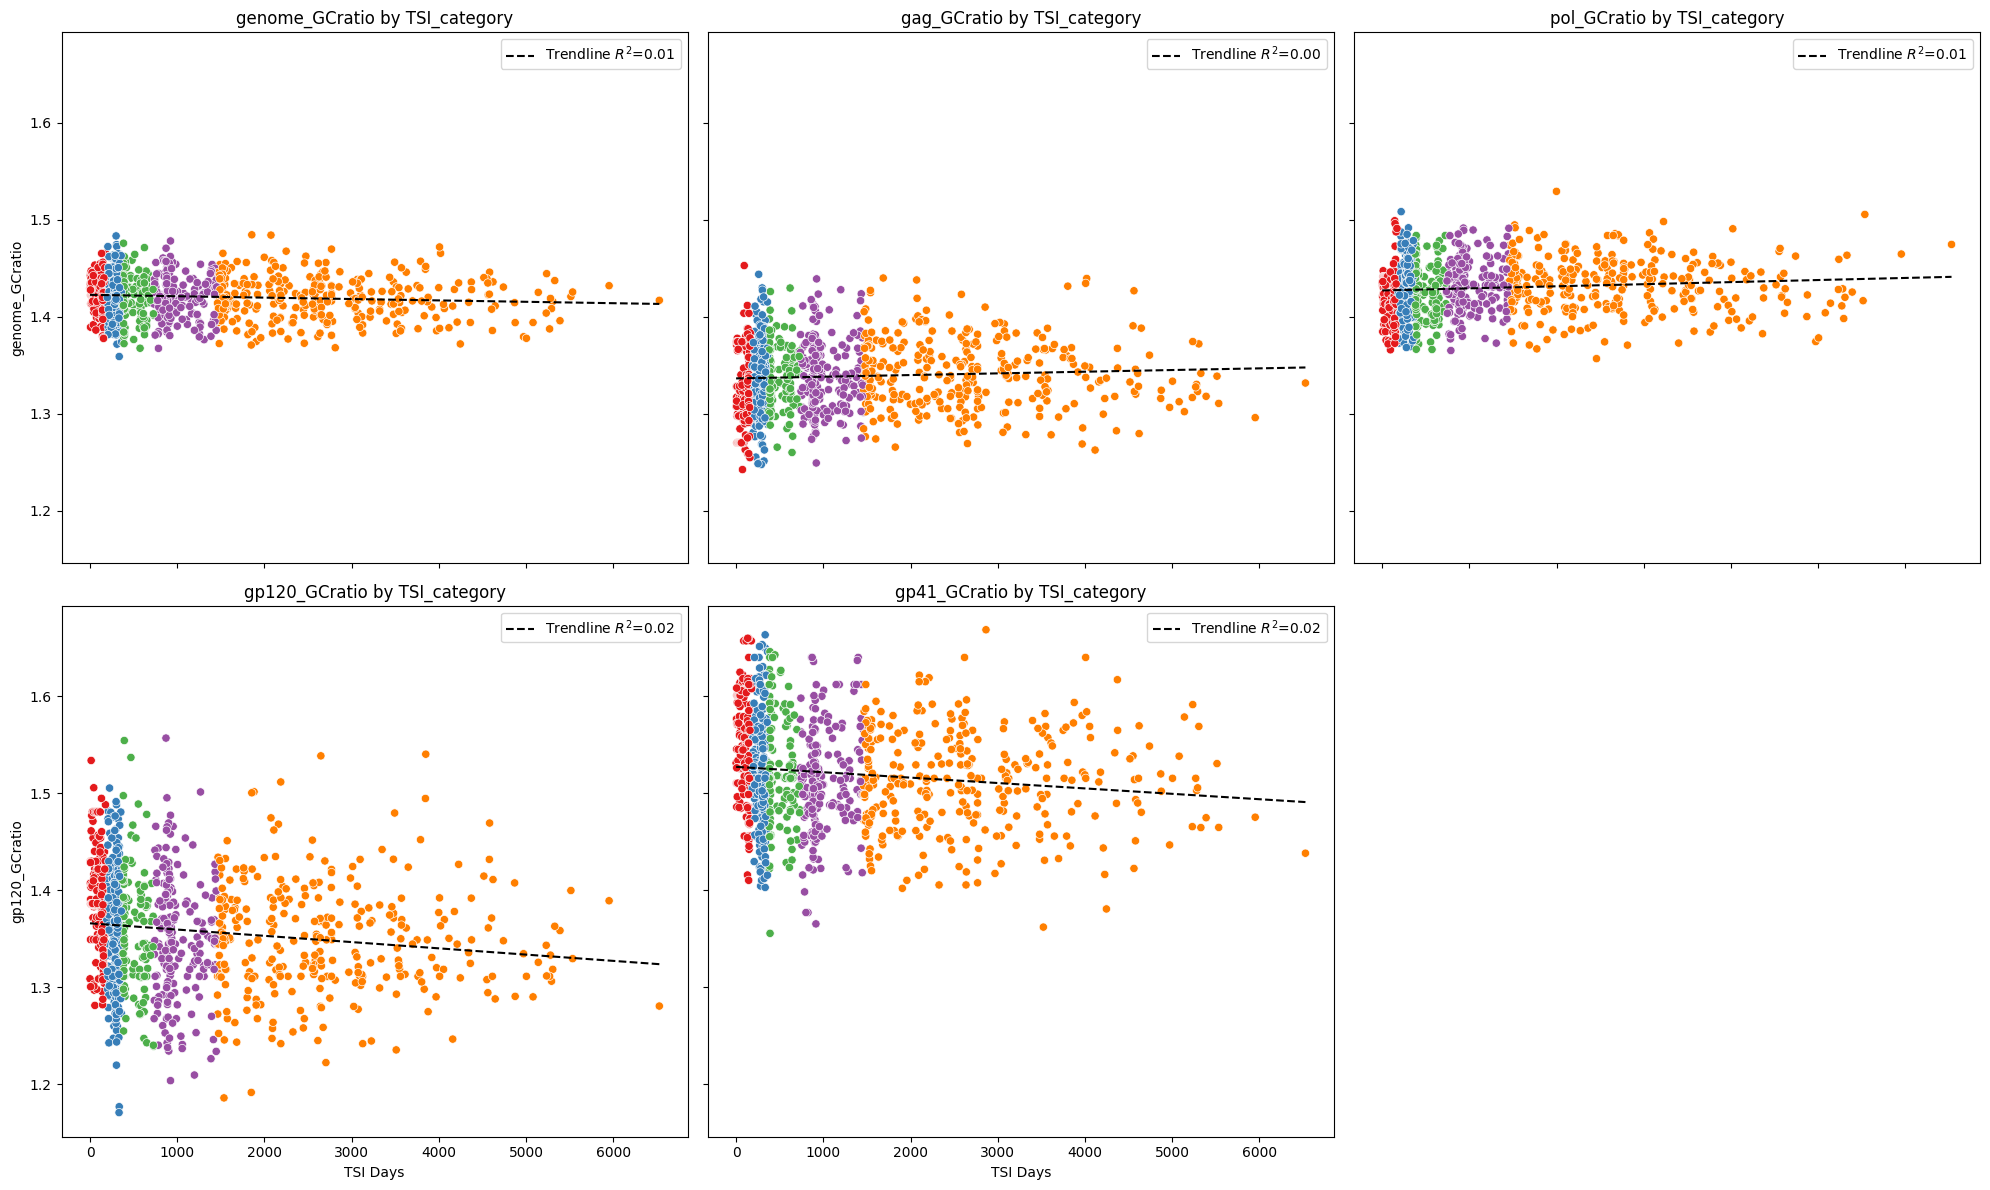

In [14]:
# List of features to plot
features = ["genome_GCratio", "gag_GCratio", "pol_GCratio", "gp120_GCratio", "gp41_GCratio"]
n_cols = 3
n_rows = int(np.ceil(len(features) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows), sharex=True, sharey=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each feature in a separate subplot
for i, feature in enumerate(features):
    ax = axes[i]
    sns.scatterplot(ax=ax, data=GC_features, x='TSI_days', y=feature, hue='TSI_category', palette='Set1', legend=False)
    ax.set_title(f'{feature} by TSI_category')
    ax.set_xlabel('TSI Days')
    ax.set_ylabel(feature)
    
    # Fit a linear regression model for the entire dataset
    subset = GC_features.dropna(subset=[feature, 'TSI_days'])
    X = subset[['TSI_days']]
    y = subset[feature]
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    
    # Add trendline
    sns.lineplot(ax=ax, x=subset['TSI_days'], y=y_pred, color='black', label=f'Trendline $R^2$={r2:.2f}', linestyle='--')
    
    ax.legend()

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()